In [109]:
from kan import *
from kan.utils import batch_jacobian, create_dataset_from_data
import numpy as np

torch.use_deterministic_algorithms(True)


#model = KAN(width=[4,[0,2],1], seed=0, base_fun='identity')
#model = KAN(width=[4,[0,2],1], seed=2, base_fun='identity')
model = KAN(width=[4,[0,2],1], seed=12, base_fun='identity')

# the model learns the Hamiltonian H = 1/2 * (x**2 + p**2)
x = torch.rand(1000,4) * 2 - 1
flow = torch.cat([x[:,[1]], -x[:,[0]], x[:,[3]], -x[:,[2]]], dim=1)
flow = flow/torch.linalg.norm(flow, dim=1, keepdim=True)

loss_fn = lambda v1, v2: torch.mean(torch.sum(v1 * v2, dim=1)**2)


def get_grad_normalized(model, x):
    grad = batch_jacobian(model, x, create_graph=True)
    grad_normalized = grad/torch.linalg.norm(grad, dim=1, keepdim=True)
    return grad_normalized

def closure():
    
    global cq_loss, reg_loss
    optimizer.zero_grad()

    grads = []
    grad = get_grad_normalized(model, x)
    cq_loss = loss_fn(grad, flow)
    reg_loss = model.reg(lamb_l1=1., entropy_offset=1e-4, lamb_coef=1.)
        
    lamb = 1e-2
    objective = cq_loss + lamb * reg_loss
    objective.backward()
    return objective

steps = 50
log = 1
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
#optimizer = torch.optim.Adam(params, lr=1e-2)
pbar = tqdm(range(steps), desc='description', ncols=100)


for _ in pbar:
    
    # update grid
    if _ < 5 and _ % 20 == 0:
        model.update_grid_from_samples(x)
            
    optimizer.step(closure)
    
    if _ % log == 0:
        pbar.set_description("| cq_loss: %.2e | reg_loss: %.2e |" % (cq_loss.cpu().detach().numpy(), reg_loss.cpu().detach().numpy()))
        
        

checkpoint directory created: ./model
saving model version 0.0


| cq_loss: 1.57e-03 | reg_loss: 1.01e+01 |: 100%|███████████████████| 50/50 [00:30<00:00,  1.63it/s]


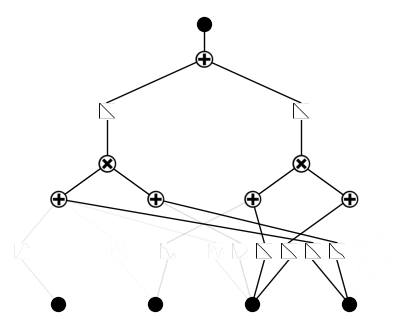

In [110]:
#model = KAN(width=[4,[0,2],1], seed=12, base_fun='identity')
model.plot()

In [111]:
model = model.prune(edge_th=5e-2)
model.auto_symbolic()

saving model version 0.1
fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,0,2) with 0
fixing (0,0,3) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with x, r2=0.9983036518096924, c=1
fixing (0,2,3) with x, r2=0.9988861680030823, c=1
fixing (0,3,0) with x, r2=0.9961345195770264, c=1
fixing (0,3,1) with x, r2=0.9859936237335205, c=1
fixing (0,3,2) with 0
fixing (0,3,3) with 0
fixing (1,0,0) with x, r2=0.9999908804893494, c=1
fixing (1,1,0) with x, r2=0.9999944567680359, c=1
saving model version 0.2


In [112]:
from kan.utils import ex_round
from sympy import *
ex_round(expand(ex_round(model.symbolic_formula()[0][0],5)),3)

-0.011*x_3**2 - 0.01*x_4**2 + 0.001*x_4 + 0.002

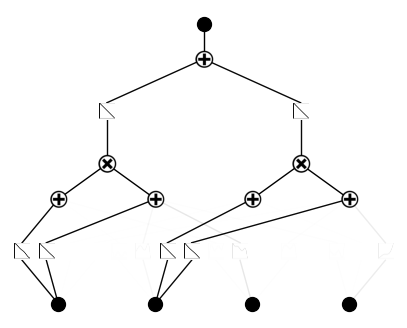

In [83]:
#model = KAN(width=[4,[0,2],1], seed=0, base_fun='identity')
model.plot()

In [84]:
model = model.prune(edge_th=5e-2)
model.auto_symbolic()

saving model version 0.1
fixing (0,0,0) with x, r2=0.9965425133705139, c=1
fixing (0,0,1) with x, r2=0.9997711181640625, c=1
fixing (0,0,2) with 0
fixing (0,0,3) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with x, r2=0.9999427199363708, c=1
fixing (0,1,3) with x, r2=0.9986546635627747, c=1
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with 0
fixing (0,2,3) with 0
fixing (0,3,0) with 0
fixing (0,3,1) with 0
fixing (0,3,2) with 0
fixing (0,3,3) with 0
fixing (1,0,0) with exp, r2=1.000000238418579, c=2
fixing (1,1,0) with x, r2=0.999911904335022, c=1
saving model version 0.2


In [85]:
model.unfix_symbolic(1,0,0)
model.fix_symbolic(1,0,0,'x')

saving model version 0.3
Best value at boundary.
r2 is 0.9992757439613342
saving model version 0.4


tensor(0.9993)

In [87]:
from kan.utils import ex_round
from sympy import *
ex_round(expand(ex_round(model.symbolic_formula()[0][0],5)),3)

-0.011*x_1**2 - 0.01*x_2**2 - 0.006

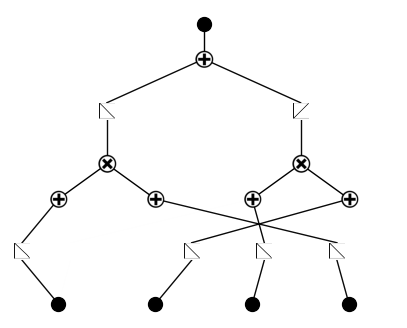

In [71]:
# model = KAN(width=[4,[0,2],1], seed=2, base_fun='identity')
model.plot()

In [72]:
model = model.prune()
model.auto_symbolic()

saving model version 0.1
fixing (0,0,0) with x, r2=0.9994129538536072, c=1
fixing (0,0,1) with 0
fixing (0,0,2) with 0
fixing (0,0,3) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,1,3) with x, r2=0.9999893307685852, c=1
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with x, r2=0.999798059463501, c=1
fixing (0,2,3) with 0
fixing (0,3,0) with 0
fixing (0,3,1) with x, r2=1.0000004768371582, c=1
fixing (0,3,2) with 0
fixing (0,3,3) with 0
fixing (1,0,0) with x, r2=0.9998863935470581, c=1
fixing (1,1,0) with exp, r2=1.0000001192092896, c=2
saving model version 0.2


In [73]:
model.unfix_symbolic(1,1,0)
model.fix_symbolic(1,1,0,'x')

saving model version 0.3
Best value at boundary.
r2 is 0.9831650257110596
saving model version 0.4


tensor(0.9832)

In [81]:
from kan.utils import ex_round
from sympy import *
ex_round(expand(ex_round(model.symbolic_formula()[0][0],5)),4)

-0.003*x_1*x_4 + 0.0031*x_2*x_3 - 0.0819